# Write a python code to provide an interactive interface to simulate the propagation of waves due to the dropped pebbles in a pool.

The interface should allow the user to do the following:

    1) Have a drop pebble button to set up the positions of multiple pebbles.
    
    2) Have a start button to initiate the animation of the wave propagation.
    
    3) 2D/3D visualization of the propagation.

We can use a sine wave to represent the height of the waves when a pebble is dropped in a pool. If we know that the center of the circle is at $x_{1}$, $y_{1}$, then we can calculate the distance $r_{1}$ to the center from a point using:
$$r_{1}= \sqrt{(x-x_{2})^2 + (y-y_{2})^2}$$

From there we can also calculate the height using the following sine wave function:

$$ h_{1}(x,y)= h_{0}sin(kr_{1})$$

where $h_{0}$ is the amplitude of the waves, $k$ is the wavevector related to the wavelength, $\lambda$ by $k= 2pi/\lambda$. 

If we decide to drop a second pebble in order to create another set of waves with the same wavelength and amplitude, but dropped at a different position $(x,y)$, the distance $r_{2}$ from the center can be calculated using:

$$r_{2}= \sqrt{(x-x_{2})^2 + (y-y_{2})^2}$$

Since we can assume that water waves add linearly if small pebbles are dropped, which in turn don't create big waves, then we can calculate the total height of the wave at a point $(x,y)$ using:

$$ h(x,y)= h_{0}sin(kr_{1}) + h_{0}sin(kr_{2})$$


## What is wave propagation?
Wave propagation is any of the ways in which waves travel.

Water waves are surface waves, which are a mixture of longitudinal and transverse waves. As a wave travels, the particles that make up the water wave travel in clockwise circles.

A wave only moves mass perpendicular to the direction of propagation, not in the direction of propagation and it transfers energy, not mass.

### You're going to need to install several items. Most of the things you'll need should already be installed, but one the libraries you might need to install is ipyidgets.

Waves if 1 Pebble is Dropped


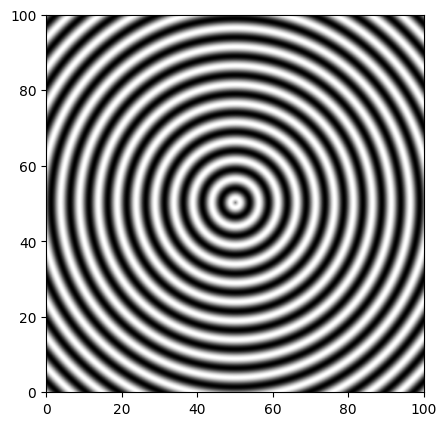

In [19]:
#Import relevant libraries.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt, sin, pi


def wave_height(wavelength, separation, pebbles): 
#Separation is how far apart centers are from each other in cm.
#Pebbles are how many pebbles are being dropped.
    
    k = 2 * pi / wavelength #Function for the wave vector which helps describe the wave.
    Amplitude =1.0  #Amplitude of the wave.
    Side = 100.0   #Size of the plot.  
    N_Points = 500  #Number of grid points along each side.       
    Spacing = Side / N_Points #Spacing of points on plot.
    
#Stores x and y values of the pebble.        
    x_values = [] 
    y_values = [] 
    
#Creates an array to store the heights.    
    x_height = np.zeros((N_Points, N_Points), float) 
    for i in range(pebbles):
        x = (Side - ((pebbles - 1) * separation)) / 2 + (separation * i) 
        y = Side / 2   
        
#Adds x and y values       
        x_values.append(x) 
        y_values.append(y) 
        
#Calculates values in the array.
    for i in range(N_Points): 
        y = Spacing * i
        for j in range(N_Points):
            x = Spacing * j
            
            r = []
            
#Calculates distance of each pebble from its center.
            for l in range(pebbles): 
                x1 = x_values[l]
                y1 = y_values[l]
                
                r.append(sqrt ((x-x1)** 2 + (y-y1)** 2))
                
#We want to store the height values as points (x,y).           
            height = 0 
    
#We calculate the height of each wave for every (x,y).
#If we have more than 1 pebble this will iterate for every value.
            for l in range(pebbles): 
                height += Amplitude * (sin(k * r[l]))
            x_height[i,j] = height
            
#Plot graph.
    plt.figure(figsize = [5,5], dpi = 100)
    plt.imshow(x_height, origin = "lower", extent = [0, Side, 0, Side])
    plt.gray()
    plt.show()
print ('Waves if 1 Pebble is Dropped')

#We can change the wavelength, separation, and the number of pebbles in order to change the following 3 plots.
wave_height(wavelength = 5, separation = 30, pebbles = 1)

Waves if 2 Pebbles Dropped


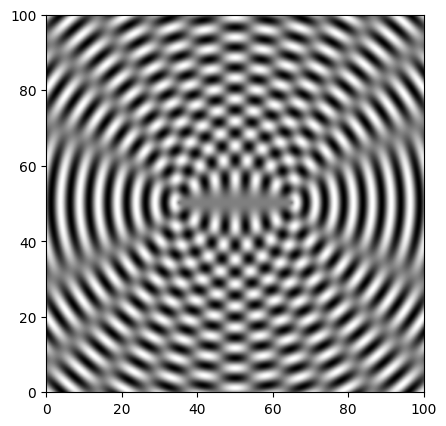

In [20]:
print('Waves if 2 Pebbles Dropped')
wave_height(wavelength = 5,separation = 30, pebbles = 2)

Waves if 3 Pebbles Dropped


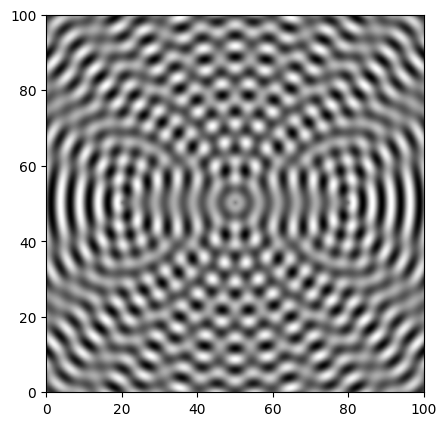

In [21]:
print ('Waves if 3 Pebbles Dropped')
wave_height(wavelength = 5, separation = 30, pebbles = 3)

### The previous plots were just to figure out how to create static plots for 3 cases in which 1 pebble, 2 pebbles, and 3 pebbles are dropped into a pool.

### Now what we want to do is actually have a running simulation. We want to see the water ripples move as we do when we drop a pebble in a pool. 

### We will be doing this by creating a grid for us to run our animation on.
### First we need to initialize the starting image for the animation.
### Then we need a normalizing function which will scale the numbers to be between 0 and 1, 0 being the color black and 1 being the color white. This is for the color of the animation.

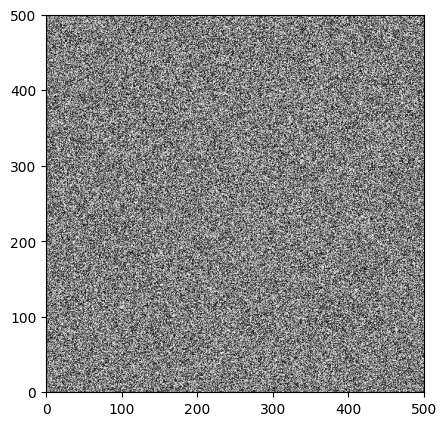

In [22]:
Side = 100.0 #Side length of the plot.
N_Points = 500 #Number of grid points along each side.

fig = plt.figure(figsize=[5,5], dpi=100) 
ax = plt.axes(xlim=(0, N_Points), ylim=(0, N_Points))
plt.gray()

#Create an array to store values for the height.
x_height = np.random.random((N_Points,N_Points)) 
im = plt.imshow(x_height, origin="lower", extent=[0,N_Points,0,N_Points])

#Generates an array plot.
def init():
    xi = np.zeros((N_Points, N_Points),float) 
    im.set_array(x_height)
    return [im]
#Normalizes plot.
def normalize(minimum, maximum, value):
    return (value-minimum)/(maximum-minimum)

### Next we will be importing HTML from IPython in order to display image and animation from matplotlib to run the animation.

### Here we define functions to call the animator and one to be called after that animator is called.

In [23]:
from IPython.display import HTML
import matplotlib.animation as animation

def update_plot(wavelength, separation, speed, pebbles):
    
#Limit sets: 512*1024*1024
    plt.rcParams['animation.embed_limit'] = 512 * 1024 * 1024 
    anim = animation.FuncAnimation(fig, animate, init_function=init,
#init_function is used to create a clear frame.
                                   
                               frames=100, fargs=(wavelength, separation, pebbles, speed), interval=30, blit=False)
#fargs is used for additional arguments to pass for each call.

#Animation as an HTML video.    
    display(HTML(anim.to_jshtml())) 

### Below you'll see that the code I used for the animation step is almost the same as the one used for the function for the wave height. 

In [24]:
def animate(frame, wavelength, separation, pebbles, speed):

    k = 2 * pi / wavelength
#Amplitude of the wave.
    Amplitude = 1.0        
#Spacing of points on plot.
    Spacing = Side / N_Points 
#Minimum height value.
    minimum= -Amplitude * pebbles 
#Maximum height value.
    maximum= Amplitude * pebbles 
    
    x_height = np.zeros((N_Points, N_Points),float)
    
    x_values = []
    y_values = []
    
    for i in range(pebbles):
        x = (side - ((pebbles - 1) * separation)) / 2 + (separation * i)
        y = side / 2
        
        x_values.append(x)
        y_values.append(y)

    for i in range(N_Points):
        y = Spacing * i
        for j in range(N_Points):
            x = Spacing * j
            
            r = []
            for l in range(pebbles):
                x1 = x_values[l]
                y1 = y_values[l]
                
                r.append(sqrt((x-x1)**2 + (y-y1)**2))
            
            total = 0
            for l in range(pebbles):
                total += Amplitude * (sin(k * r[l] - (frame * speed)))
                
#Normalize the height.                
            x_height[i,j] = normalize(minimum, maximum, total) 
            
#Sets image to the x_height.
    im.set_array(x_height) 

    return [im]

### Now we add widgets to our animation. You'll need to import ipywidgets now assuming you have already installed the library.
### Using widgets is what will allow us to make our animation interactive. Here we can control how many pebbles we want to drop, the separation of the centers, the wavelength, and the speed at which we want the waves to propagate.
### Below you will find instructions on how to operate the animation.

In [25]:
#Import relevant library.
import ipywidgets as widgets

#Drop down table for number of pebbles you want and sliders.
pebbles = widgets.Dropdown(options = [1,2,3,4,5,6,7,8,9,10], value = 1, description = 'Number of Pebbles:', disabled = False)
separation = widgets.FloatSlider(min=5, max=50, value=25, step=5, description = "Separation")
wavelength = widgets.FloatSlider(min=0, max=10, value=5 ,step=.5, description = "Wavelength")
speed = widgets.FloatSlider(min=0, max=1, value=.25 ,step=.05, description = "Speed")

#Prints instructions.
print ('1) Use slider controls to change the Wavelength, Separation, and the Speed.')
print ('2) Select the number of pebbles you wish to drop.')
print ('3) Click "Run Interact" to load the widget.')
print ('4a) Select once if you wish to play it once.')
print ('4b) Select loop if you wish to continue the wave propagation.')
print ('4c) Select reflect if you wish to run the wave propagation in reverse.')
widgets.interact_manual(update_plot, separation = separation, wavelength = wavelength, pebbles = pebbles, speed = speed)

1) Use slider controls to change the Wavelength, Separation, and the Speed.
2) Select the number of pebbles you wish to drop.
3) Click "Run Interact" to load the widget.
4a) Select once if you wish to play it once.
4b) Select loop if you wish to continue the wave propagation.
4c) Select reflect if you wish to run the wave propagation in reverse.


interactive(children=(FloatSlider(value=5.0, description='Wavelength', max=10.0, step=0.5), FloatSlider(value=…

<function __main__.update_plot(wavelength, separation, speed, pebbles)>

##### I didn't have enough time to try to make a 3D simulation. I was using vpython to try to make it work, but it wasn't working at all.

## References

Lecture: https://github.com/qzhu2017/ComputationalPhysics300/blob/master/Lectures/Lec_04_Python_intro_IV.ipynb

Wave Animation Buttons:
    https://ocefpaf.github.io/python4oceanographers/blog/2013/11/25/waves/

Wave Animation 2D Ripples:
    https://www.youtube.com/watch?v=BZUdGqeOD0w

Water Wave Theory:
    https://courses.lumenlearning.com/boundless-physics/chapter/waves/

Wave Behavior:
    https://serpmedia.org/scigen/e4.4.html